<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

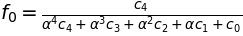

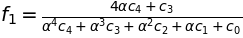

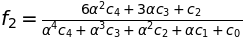

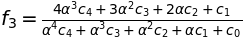

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

sympy.core.relational.Equality

<IPython.core.display.Latex object>

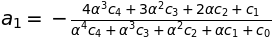

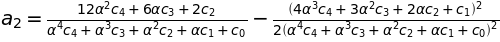

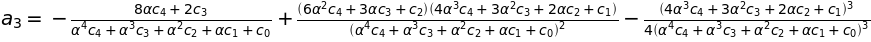

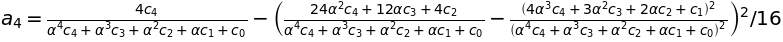

<IPython.core.display.Latex object>

In [1]:
import sympy as sy
from sympy import Symbol, Eq, Rational, sqrt, solve
from sympy.abc import a, b, c, d, m, x, y, alpha, beta, gamma

from IPython.display import display, Latex

from util import *
from transform import *
from ec import EllipticCurve, Point

__all__ = [
    'gammas_at',
    'gammas',
    'gamma_nice'
    'gamma',
    'beta',
    'beta_',
    'qq',
    'factor',
    'check_newly',
    ]

for subscript in range(5):
    for var in 'abcdefgh':
        name = '{}{}'.format(var, subscript)
        globals()[name] = Symbol(name)

def show(eqs):
    display(Latex('\n'.join(
        [r'\begin{align}']
        + list(r'{} &= {} \\'.format(sy.latex(eq.lhs), sy.latex(eq.rhs)) for eq in eqs)
        + [r'\end{align}']
    )))

In [2]:
p1_ = mk_deg(4, 1, xg)
p2_ = mk_deg(4, 2, xg)
eqs = nontriv(equate(f_it(3), p1_*p2_, xg))
show(eqs)

<IPython.core.display.Latex object>

In [3]:
eqs = nontriv(bigsubs(bigsubs(eqs, d1, d), d2, -d))
show(eqs)

<IPython.core.display.Latex object>

In [4]:
eqs = nontriv(bigsubs(bigsubs(eqs, a1, a), a2, a))
show(eqs)

<IPython.core.display.Latex object>

In [5]:
eqs = nontriv(bigsubs(bigsubs(eqs, b1, b), b2, -b))
show(eqs)

<IPython.core.display.Latex object>

In [6]:
eqs = nontriv(bigsubs(bigsubs(eqs, c1, c), c2, c))
show(eqs)

<IPython.core.display.Latex object>

In [7]:
eqs = nontriv(bigsubs(eqs, c, only(solve(eqs[3], c))))
show(eqs)

<IPython.core.display.Latex object>

In [8]:
eqs = nontriv(bigsubs(eqs, a, only(solve(eqs[2], a))))
show(eqs)

<IPython.core.display.Latex object>

In [9]:
b_s = solve(eqs[1], b)
display(Latex('$b={}$'.format(sy.latex(b_s))))

<IPython.core.display.Latex object>

In [10]:
gammas = [ only(solve(eqs[0].subs(b, b_), gamma)) for b_ in b_s ]
display(Latex('$\gamma={}$'.format(sy.latex(gammas))))

<IPython.core.display.Latex object>

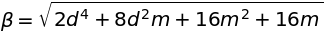

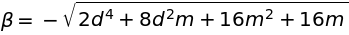

In [11]:
beta_ = sqrt(2*d**4 + 8*m*d**2 + 16*m**2 + 16*m)
beta__ = sqrt(2)*sqrt(d**4 + 4*m*d**2 + 8*m**2 + 8*m)
assert beta_ == beta__.simplify()
tmp = gammas[0].subs(beta__, beta).expand().subs(beta**2, beta_**2).expand()
gamma_nice = beta*tmp.coeff(beta, n=1) + tmp.coeff(beta, n=0)
display(Eq(beta, beta_))
display(Eq(beta, -beta_))
display(Eq(gamma, gamma_nice))

In [12]:
qq = 2*d**4 + 8*d**2*m + 16*m**2 + 16*m

def gammas_at(m_, d_):
    for gamma_ in gammas:
        yield gamma_.subs(d, d_).subs(m, m_)

xg_ = x - gamma
p1_ = a + b*xg_ + c*xg_**2 + d*xg_**3 + xg_**4
p2_ = a - b*xg_ + c*xg_**2 - d*xg_**3 + xg_**4

def factor(gamma_, m_, d_):
    f_ = ((x - gamma_)**2 + gamma_ + m_).expand().as_poly(x)
    fff_ = f_.compose(f_).compose(f_).as_expr().expand()
    c_ = (4*m_ + d_**2)/2
    a_ = sqrt(gamma_ + m_**4 + 2*m_**3 + m_**2 + m_)
    b_ = (6*m_**2 + 2*m_ - 2*a - c_**2)/(-2*d_)
    fff = p1_*p2_
    if fff_ == fff.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, a_).subs(gamma, gamma_).expand():
        return (
            p1_.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, a_).subs(gamma, gamma_).expand(),
            p2_.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, a_).subs(gamma, gamma_).expand(),
            )
    if fff_ == fff.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, -a_).subs(gamma, gamma_).expand():
        return (
            p1_.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, -a_).subs(gamma, gamma_).expand(),
            p2_.subs(d, d_).subs(c, c_).subs(b, b_).subs(a, -a_).subs(gamma, gamma_).expand(),
            )
    assert False

def check_newly(gamma_, m_):
    return not sqrt(-gamma_ - m_).is_Rational and (not sqrt(-2*m_ + 2*sqrt(gamma_ + m_**2 + m_)).is_Rational and not sqrt(-2*m_ - 2*sqrt(gamma_ + m_**2 + m_)).is_Rational)